In [497]:
#Independent Data Science Project Part 1 by Zara Clacken
#Data Source: "Children in single-parent families by race in the United States", Kids Count Data Center,  https://bit.ly/2O5A5tZ
#Research Question: What percentage of the total population of children living in single parent homes during the 2010s in the United States
#does each race make up? 

In [498]:
#Import Packages
import warnings
warnings.filterwarnings('ignore')  
import numpy as np
import pandas as pd 

In [499]:
#Import Raw Data Set
singleparentkidsraw = pd.read_excel('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Raw Data/Children in single-parent families by race.xlsx') 
singleparentkidsraw

,LocationType,Location,Race,TimeFrame,DataFormat,Data
0,Nation,United States,American Indian,2005,Percent,0.49
1,Nation,United States,Asian and Pacific Islander,2005,Percent,0.17
2,Nation,United States,Black or African American,2005,Percent,0.65
3,Nation,United States,Hispanic or Latino,2005,Percent,0.36
4,Nation,United States,Non-Hispanic White,2005,Percent,0.23
...,...,...,...,...,...,...
11077,Territory,Puerto Rico,Non-Hispanic White,2019,Number,S
11078,Territory,Puerto Rico,Hispanic or Latino,2019,Number,341000
11079,Territory,Puerto Rico,Black or African American,2019,Number,44000
11080,Territory,Puerto Rico,Asian and Pacific Islander,2019,Number,S


In [500]:
#Column Names?
singleparentkidsraw.columns




Index(['LocationType', 'Location', 'Race', 'TimeFrame', 'DataFormat', 'Data'], dtype='object')

In [501]:
#Number of Rows?
len(singleparentkidsraw)

11082

---

In [502]:
#Change Column Names
singleparentkidsraw.columns = ['LocationType', 'Location', 'Race', 'Year', 'DataFormat', 'TotalChildren']
singleparentkidsraw.columns

Index(['LocationType', 'Location', 'Race', 'Year', 'DataFormat',
       'TotalChildren'],
      dtype='object')

---

In [503]:
#What are the Unique Values of each Column?
singleparentkidsraw.LocationType.unique()     

array(['Nation', 'State', 'City', 'Territory'], dtype=object)

In [504]:
singleparentkidsraw.DataFormat.unique()    

array(['Percent', 'Number'], dtype=object)

In [505]:
singleparentkidsraw.Race.unique()   

array(['American Indian', 'Asian and Pacific Islander',
       'Black or African American', 'Hispanic or Latino',
       'Non-Hispanic White', 'Two or more races', 'Total'], dtype=object)

In [506]:
singleparentkidsraw.Year.unique()   

array([2005, 2006, 2007, 2008, 2013, 2018, 2009, 2010, 2015, 2011, 2012,
       2014, 2016, 2017, 2019], dtype=int64)

---

In [507]:
#Drop LocationType, Location, DataFormat, and Data Columns
#Filter Data Set to show the years 2010-2019 

YearFilter1 = singleparentkidsraw.Year > 2009  
YearFilter2 = singleparentkidsraw.Year < 2020
FormatFilter = singleparentkidsraw.DataFormat == 'Number'
LocationFilter = singleparentkidsraw.LocationType == 'Nation'
TotalFilter = singleparentkidsraw.Race != 'Total'

singleparentkids = singleparentkidsraw[YearFilter1][YearFilter2][FormatFilter][LocationFilter][TotalFilter].drop(['LocationType','Location','DataFormat'], axis = 1)

singleparentkids.tail(11)

,Race,Year,TotalChildren
184,Non-Hispanic White,2017,8623000
185,Hispanic or Latino,2017,7283000
186,Black or African American,2017,6123000
187,Asian and Pacific Islander,2017,556000
188,American Indian,2017,351000
203,Non-Hispanic White,2019,8479000
204,Hispanic or Latino,2019,7339000
205,Black or African American,2019,5988000
206,Asian and Pacific Islander,2019,549000
208,Two or more races,2019,1923000


In [508]:
#Race Values?
singleparentkids.Race.unique()

array(['American Indian', 'Asian and Pacific Islander',
       'Black or African American', 'Hispanic or Latino',
       'Non-Hispanic White', 'Two or more races'], dtype=object)

In [509]:
#Year Values the Same?
singleparentkids.Year.unique()

array([2013, 2018, 2010, 2011, 2015, 2012, 2014, 2016, 2017, 2019],
      dtype=int64)

In [510]:
#How many rows in data frame now?
len(singleparentkids)

60

---

In [511]:
#Check Variable Data Types
singleparentkids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 63 to 209
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Race           60 non-null     object
 1   Year           60 non-null     int64 
 2   TotalChildren  60 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [512]:
#Change Variable Data Types
singleparentkids.Year = singleparentkids.Year.astype('category')
singleparentkids.Race = singleparentkids.Race.astype('category')
singleparentkids.TotalChildren = singleparentkids.TotalChildren.astype('int64')

In [513]:
#Check Data Type Changes
singleparentkids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 63 to 209
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           60 non-null     category
 1   Year           60 non-null     category
 2   TotalChildren  60 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 1.6 KB


---

In [514]:
singleparentkids.head(6)

,Race,Year,TotalChildren
63,American Indian,2013,329000
64,Asian and Pacific Islander,2013,557000
65,Black or African American,2013,6427000
66,Hispanic or Latino,2013,7044000
67,Non-Hispanic White,2013,9289000
68,Two or more races,2013,1758000


In [515]:
singleparentkids.Race.unique()

[American Indian, Asian and Pacific Islander, Black or African American, Hispanic or Latino, Non-Hispanic White, Two or more races]
Categories (6, object): [American Indian, Asian and Pacific Islander, Black or African American, Hispanic or Latino, Non-Hispanic White, Two or more races]

In [516]:
singleparentkids.Year.unique()

[2013, 2018, 2010, 2011, 2015, 2012, 2014, 2016, 2017, 2019]
Categories (10, int64): [2013, 2018, 2010, 2011, ..., 2014, 2016, 2017, 2019]

---

In [517]:
#Percentage Each Race is of Total Single Parent Children

In [518]:
#Total Number of Children of All Races Per Year

yearlist = [2013, 2018, 2010, 2011, 2015, 2012, 2014, 2016, 2017, 2019]

for Y in yearlist:
    S = singleparentkids[singleparentkids.Year == Y].TotalChildren.sum()
    print(Y,':',S, ',', end =' ')

2013 : 25404000 , 2018 : 24832000 , 2010 : 25011000 , 2011 : 25434000 , 2015 : 25216000 , 2012 : 25486000 , 2014 : 25469000 , 2016 : 25088000 , 2017 : 24823000 , 2019 : 24619000 , 

In [519]:
#Create a Dictionary For the Sums 
Sums = {2013 : 25404000 , 2018 : 24832000 , 2010 : 25011000 , 2011 : 25434000 , 2015 : 25216000 , 2012 : 25486000 , 2014 : 25469000 ,
        2016 : 25088000 , 2017 : 24823000 , 2019 : 24619000} 
Sums[2015]

25216000

In [520]:
#Create New Column for Percentage of a Year's Total Population 
singleparentkids['PercentofTotalPopulation'] = " "
singleparentkids

,Race,Year,TotalChildren,PercentofTotalPopulation
63,American Indian,2013,329000,
64,Asian and Pacific Islander,2013,557000,
65,Black or African American,2013,6427000,
66,Hispanic or Latino,2013,7044000,
67,Non-Hispanic White,2013,9289000,
68,Two or more races,2013,1758000,
71,Two or more races,2018,1944000,
72,Non-Hispanic White,2018,8526000,
73,Hispanic or Latino,2018,7301000,
74,Black or African American,2018,6166000,


In [521]:
len(singleparentkids)

60

In [522]:
#Create a function, using the dictionary, to calculate percentages 
import numpy as np
percentages = []
for Y in yearlist:
    percentages.append(np.round(100*(singleparentkids[singleparentkids.Year == Y].TotalChildren/Sums[Y]),2))
P = np.array(percentages).reshape(60,1)
P

array([[ 1.3 ],
       [ 2.19],
       [25.3 ],
       [27.73],
       [36.57],
       [ 6.92],
       [ 7.83],
       [34.33],
       [29.4 ],
       [24.83],
       [ 2.2 ],
       [ 1.4 ],
       [ 1.4 ],
       [ 2.16],
       [26.12],
       [26.68],
       [37.3 ],
       [ 6.34],
       [ 1.4 ],
       [ 2.2 ],
       [25.59],
       [27.09],
       [37.22],
       [ 6.51],
       [ 7.15],
       [35.68],
       [28.47],
       [25.12],
       [ 2.25],
       [ 1.32],
       [ 1.35],
       [ 2.27],
       [25.48],
       [27.5 ],
       [36.72],
       [ 6.68],
       [ 1.34],
       [ 2.27],
       [25.06],
       [28.23],
       [36.05],
       [ 7.06],
       [ 7.57],
       [34.94],
       [28.82],
       [25.04],
       [ 2.28],
       [ 1.35],
       [ 7.6 ],
       [34.74],
       [29.34],
       [24.67],
       [ 2.24],
       [ 1.41],
       [34.44],
       [29.81],
       [24.32],
       [ 2.23],
       [ 7.81],
       [ 1.39]])

In [523]:
#Insert Percent Column into Data Frame
singleparentkids['PercentofTotalPopulation'] = P 
singleparentkids

,Race,Year,TotalChildren,PercentofTotalPopulation
63,American Indian,2013,329000,1.30
64,Asian and Pacific Islander,2013,557000,2.19
65,Black or African American,2013,6427000,25.30
66,Hispanic or Latino,2013,7044000,27.73
67,Non-Hispanic White,2013,9289000,36.57
68,Two or more races,2013,1758000,6.92
71,Two or more races,2018,1944000,7.83
72,Non-Hispanic White,2018,8526000,34.33
73,Hispanic or Latino,2018,7301000,29.40
74,Black or African American,2018,6166000,24.83


---

In [524]:
#Import Seaborn 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [525]:
#Unique Races
singleparentkids.Race.unique().tolist()


['American Indian',
 'Asian and Pacific Islander',
 'Black or African American',
 'Hispanic or Latino',
 'Non-Hispanic White',
 'Two or more races']

In [526]:
#Replace American Indian with Native American 
singleparentkids.Race = singleparentkids.Race.replace('American Indian','Native American')
singleparentkids

,Race,Year,TotalChildren,PercentofTotalPopulation
63,Native American,2013,329000,1.30
64,Asian and Pacific Islander,2013,557000,2.19
65,Black or African American,2013,6427000,25.30
66,Hispanic or Latino,2013,7044000,27.73
67,Non-Hispanic White,2013,9289000,36.57
68,Two or more races,2013,1758000,6.92
71,Two or more races,2018,1944000,7.83
72,Non-Hispanic White,2018,8526000,34.33
73,Hispanic or Latino,2018,7301000,29.40
74,Black or African American,2018,6166000,24.83


In [527]:
#Replace Non-Hispanic White with White
singleparentkids.Race = singleparentkids.Race.replace ('Non-Hispanic White','White')
singleparentkids

,Race,Year,TotalChildren,PercentofTotalPopulation
63,Native American,2013,329000,1.30
64,Asian and Pacific Islander,2013,557000,2.19
65,Black or African American,2013,6427000,25.30
66,Hispanic or Latino,2013,7044000,27.73
67,White,2013,9289000,36.57
68,Two or more races,2013,1758000,6.92
71,Two or more races,2018,1944000,7.83
72,White,2018,8526000,34.33
73,Hispanic or Latino,2018,7301000,29.40
74,Black or African American,2018,6166000,24.83


In [528]:
#Replace Two or more races with Multiracial
singleparentkids.Race = singleparentkids.Race.replace ('Two or more races','Multiracial')
singleparentkids

,Race,Year,TotalChildren,PercentofTotalPopulation
63,Native American,2013,329000,1.30
64,Asian and Pacific Islander,2013,557000,2.19
65,Black or African American,2013,6427000,25.30
66,Hispanic or Latino,2013,7044000,27.73
67,White,2013,9289000,36.57
68,Multiracial,2013,1758000,6.92
71,Multiracial,2018,1944000,7.83
72,White,2018,8526000,34.33
73,Hispanic or Latino,2018,7301000,29.40
74,Black or African American,2018,6166000,24.83


In [529]:
#Replace Hispanic or Latino with Hispanic
singleparentkids.Race = singleparentkids.Race.replace ('Hispanic or Latino','Hispanic')
singleparentkids

,Race,Year,TotalChildren,PercentofTotalPopulation
63,Native American,2013,329000,1.30
64,Asian and Pacific Islander,2013,557000,2.19
65,Black or African American,2013,6427000,25.30
66,Hispanic,2013,7044000,27.73
67,White,2013,9289000,36.57
68,Multiracial,2013,1758000,6.92
71,Multiracial,2018,1944000,7.83
72,White,2018,8526000,34.33
73,Hispanic,2018,7301000,29.40
74,Black or African American,2018,6166000,24.83


In [530]:
#Replace Black or African-American with Black
singleparentkids.Race = singleparentkids.Race.replace ('Black or African American','Black')
singleparentkids

,Race,Year,TotalChildren,PercentofTotalPopulation
63,Native American,2013,329000,1.30
64,Asian and Pacific Islander,2013,557000,2.19
65,Black,2013,6427000,25.30
66,Hispanic,2013,7044000,27.73
67,White,2013,9289000,36.57
68,Multiracial,2013,1758000,6.92
71,Multiracial,2018,1944000,7.83
72,White,2018,8526000,34.33
73,Hispanic,2018,7301000,29.40
74,Black,2018,6166000,24.83


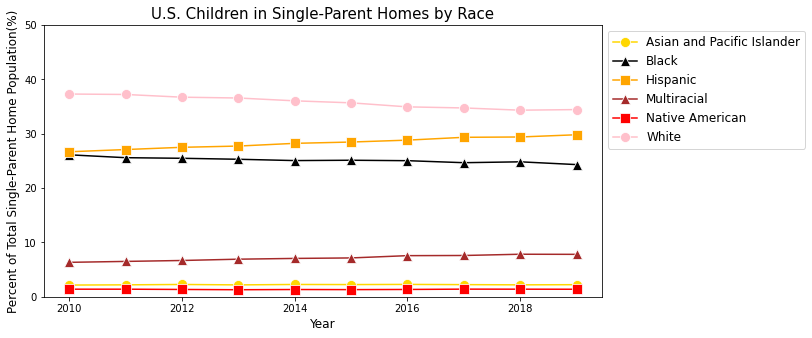

In [531]:
#Create Plot 
 

#Create Lists and Dictionaries
racelist = sorted(['Native American', 'Asian and Pacific Islander', 'Black', 'Hispanic', 'White', 'Multiracial'])
LineColor = {'Native American':'Red', 'Asian and Pacific Islander': 'Gold', 'Black':'Black',
             'Hispanic':'Orange', 'White': 'Pink', 'Multiracial': 'Brown' }
LineMarker = {'Native American':'s', 'Asian and Pacific Islander': 'o', 'Black':'^',
             'Hispanic':'s', 'White': 'o', 'Multiracial': '^' }




#Define plot's function 
def kidsplot(racelist):
    for race in racelist:
        sns.lineplot(data = singleparentkids[singleparentkids.Race == race], x = 'Year', y = 'PercentofTotalPopulation', label = race,\
                     c= LineColor[race], marker = LineMarker[race], markersize = 10)
    plt.legend(loc ='upper left', bbox_to_anchor = (1,1), prop = {'size': 12})
    plt.title("U.S. Children in Single-Parent Homes by Race", fontsize = 15)
    plt.ylabel('Percent of Total Single-Parent Home Population(%)', fontsize = 12)
    plt.xlabel('Year', fontsize = 12)
    plt.ylim(0,50)
    
    plt.show


    
#Plot Size
plt.rcParams['figure.figsize'] = (10,5)
    
#Print Plot 
kidsplot(racelist)




---

In [532]:
singleparentkids.columns

Index(['Race', 'Year', 'TotalChildren', 'PercentofTotalPopulation'], dtype='object')

In [533]:
#Change Column Names Again For Export to be joined with other dataframes in SQL
singleparentkids.columns = ['Race', 'Year', 'Number of Children(Single Parent Homes)', 'Percent of Total Children(Single Parent Homes)']
singleparentkids

,Race,Year,Number of Children(Single Parent Homes),Percent of Total Children(Single Parent Homes)
63,Native American,2013,329000,1.30
64,Asian and Pacific Islander,2013,557000,2.19
65,Black,2013,6427000,25.30
66,Hispanic,2013,7044000,27.73
67,White,2013,9289000,36.57
68,Multiracial,2013,1758000,6.92
71,Multiracial,2018,1944000,7.83
72,White,2018,8526000,34.33
73,Hispanic,2018,7301000,29.40
74,Black,2018,6166000,24.83


In [534]:
#Export Single Parent Kids Data Frame as a CSV
#singleparentkids.to_csv('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Created CSV Files/2010-2019_Single_Parent_Children_By_Race.csv')